In [ ]:
! nvidia-smi

Thu Aug 20 02:35:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import pandas_datareader
stocks = pandas_datareader.get_data_yahoo('2330.TW')

In [ ]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-08-24,121.0,112.5,120.0,115.0,116158000.0,96.807365
2015-08-25,124.0,117.5,118.0,123.5,94960000.0,103.962685
2015-08-26,124.5,119.5,121.0,122.5,64879000.0,103.120888
2015-08-27,125.0,122.0,125.0,124.0,53388000.0,104.383583
2015-08-28,127.0,124.5,127.0,125.0,41466000.0,105.225380


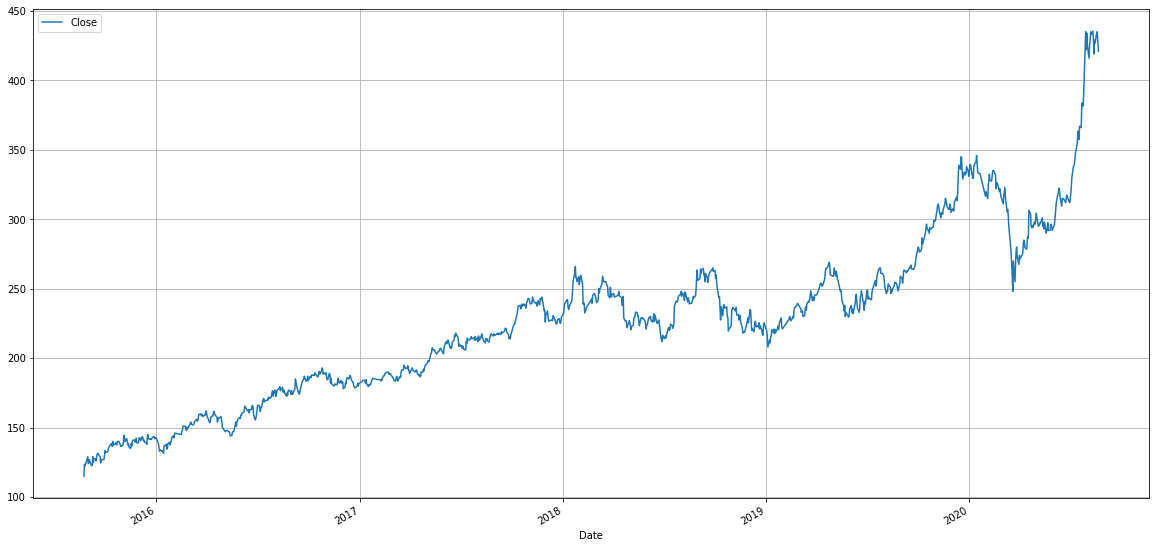

In [ ]:
stocks['Close'].plot(kind = 'line', figsize = [20,10], grid=True, legend=True)

In [ ]:
stocks['ma180'] = stocks['Close'].rolling(window = 180).mean()

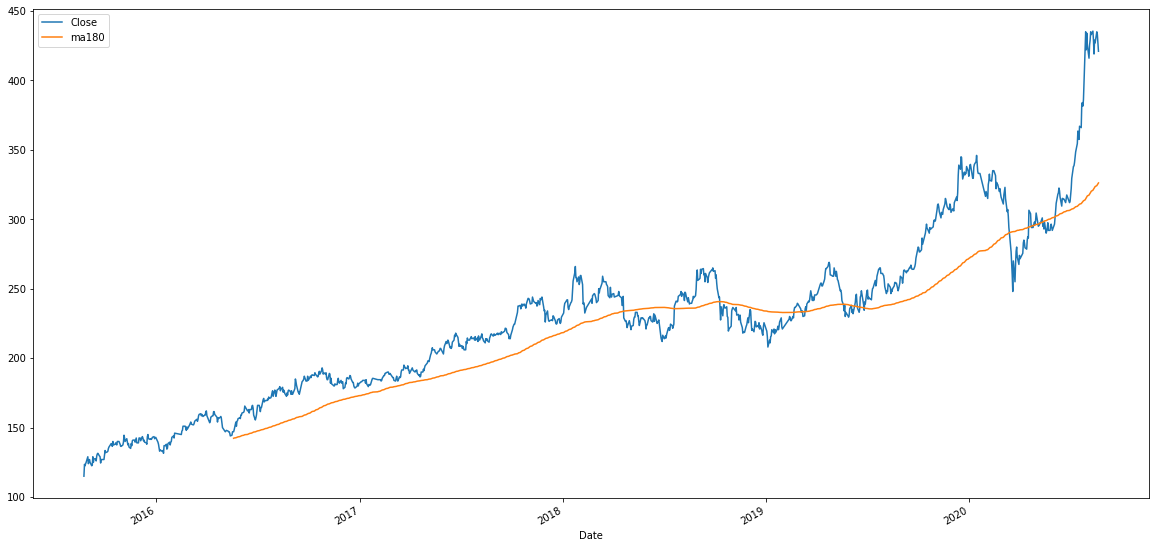

In [ ]:
stocks[['Close', 'ma180']].plot(kind = 'line', figsize = [20,10])

In [ ]:
import pandas
dfs = pandas.read_html('https://rate.bot.com.tw/xrt/quote/l6m/USD')

In [ ]:
df = dfs[0].iloc[:,[0,2]]

In [ ]:
df.columns = ['日期', '匯率']

In [ ]:
df.head()

,日期,匯率
0,2020/08/20,28.995
1,2020/08/19,29.080
2,2020/08/18,29.080
3,2020/08/17,29.100
4,2020/08/14,29.120


In [ ]:
import sqlite3
with sqlite3.connect('test.db') as con:
  df.to_sql('exchange', con = con)

In [ ]:
import requests
headers = {
   'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.125 Safari/537.36' 
}
res = requests.get('https://goodinfo.tw/StockInfo/StockBzPerformance.asp?STOCK_ID=2330', headers = headers)
res.encoding = 'utf-8'


In [ ]:
import pandas
dfs = pandas.read_html(res.text)

In [ ]:
#dfs[8]

In [ ]:
import requests
headers = {
  'cookie': 'buuid=LzlWb3hwMkM5K2RpYmoyVmliNmZ6d2tWY2dlaTlyZjcvMWFCRXhXTzhsSGVFTmg5bCtBWld1Tk04NEdJaEZkay0tVmdXY2xFRWdVU3BSZFhBb08vTk9LZz09--57276bb3ce0c725bbc04fb8c5abeb85dd6afd2d7; easy_ab=3e6118a4-03d9-43da-8268-6786151a7d84; _ga=GA1.2.2000006587.1597896557; _gid=GA1.2.233461786.1597896557; _gat=1; upgrade_browser=1; _gali=login-form; remember_user_token=W1s0MzAzNzZdLCIkMmEkMTAkMkJJS2JBZXNGUmliQW9OcXpIV2M2LiIsIjE1OTc4OTY1NzcuMjIzNTc2NSJd--f14ea37e25d382dd4e6fcb69d03b1e844657a87d; _statementdog_session_v2=c3lJQTZ6Ym94M2Vwd0tuR3gxVWFuOHd2K0hmRjJLak93SjVDeVBiU3dVN0RwSEZhdHl3MXk2bWp3SUlLR1QvenlpVWVmZHZBWm9CNUlrWjM3a29TdG5iamg3U3F0T00yUFZPQlFaQ0kwQS9YQlh6RTFUVzZHQ3BKV3RLWVczUkVjUUhOQkJpUGRqM29xclBHaW9SVm12YVpwcy9oS3RFRC8rWTVHb2tMZ2dVWnRlNHlrb2t6YnMyajdHM1lHZVFkNWttOE9NOGNEcVA5Znl6VCtGRVgwV2FNTUZrRnlGRHd2a1BRN3ZxNnB2eE9HT1NqS2pjYVlNSCt4M09HNmVjTWpXSGlEcUZreGU1YjV6TWFxK2VSM1ZXN1dOQkhIVFY3U2VFWnBNaWM2WGNrMUxCRE1TMkRSbmRaUVBwUW51cCtoU3VVdks0Ym5lREZQNDYzdkN3NE9BPT0tLW1OeWZHQkJBMGw3aVhMWEFHa21xTHc9PQ%3D%3D--95a9c04179c1e8e3e4271cc4a2c059373fc8811e; amplitude_id_0ab77a441fbc226251ef1a272380fcd7statementdog.com=eyJkZXZpY2VJZCI6IjhhMDdjYjJjLTRlNDEtNGY4ZC1iNTlkLTFkZTE0YTljYmJjMlIiLCJ1c2VySWQiOiI0MzAzNzYiLCJvcHRPdXQiOmZhbHNlLCJzZXNzaW9uSWQiOjE1OTc4OTY1NTY3NDQsImxhc3RFdmVudFRpbWUiOjE1OTc4OTY1Nzc4NDAsImV2ZW50SWQiOjMsImlkZW50aWZ5SWQiOjQsInNlcXVlbmNlTnVtYmVyIjo3fQ=='  
}
res = requests.get('https://statementdog.com/api/v1/feeds?&_=1597896578141', headers = headers)
res.text

'{"items":[{"type":"news","id":3310153,"title":"台積電ADR19日下跌0.87美元跌幅1.10%折台股463.51元","source_url":"https://tw.stock.yahoo.com/news/%E5%8F%B0%E7%A9%8D%E9%9B%BBadr19%E6%97%A5%E4%B8%8B%E8%B7%8C0-87%E7%BE%8E%E5%85%83%E8%B7%8C%E5%B9%851-10-%E6%8A%98%E5%8F%B0%E8%82%A1463-51%E5%85%83-011110302.html","likers_count":0,"liked":false,"collected":false,"related_stocks":[{"id":323,"ticker":"2330","name":"台積電"}],"total_comments_count":0,"created_at":"2020-08-20T09:11:10+08:00","created_or_replied_at":"2020-08-20T09:11:10+08:00","comments_count":0,"comments":[],"comments_pagination":{"has_more_comments":false,"next_url":null},"content":"(中央社台北2020年 8月20日電)台積電在NYSE掛牌 ADR以 78.54美元作收，下跌0.87美元，跌幅 1.10%。由於每單位台積電 ADR相當於台股 5股台積電普通股，以 8月19日新台幣"},{"type":"announcement","id":1262747,"title":"本公司代子公司 TSMC Global Ltd. 公告取得固定收益證券","source_url":"https://mops.twse.com.tw/mops/web/t05st02?step=1&off=1&firstin=1&TYPEK=sii&i=213&h2130=%A5%78%BF%6E%B9%71&h2131=2330&h2132=20200819&h2133=181851&h2134=%A5%BB%A4%BD%A5%71%A5

## Machine Learning

In [ ]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [ ]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
df  = df.iloc[:,3:]
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [ ]:
df['international_plan'] = df['international_plan'].replace({'yes':1, 'no':0})
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes':1, 'no':0})
df['churn'] = df['churn'].replace({'yes':1, 'no':0})

In [ ]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
y.head()

1    0
2    0
3    0
4    0
5    0
Name: churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.2) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(train_X, train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred_y = clf.predict(test_X)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(test_y, pred_y)

0.9415292353823088

In [ ]:
confusion_matrix(test_y, pred_y)

array([[564,  11],
       [ 28,  64]])

## Spark

In [ ]:
a = [1,2,3,4,5,6,7,8]

b = [] 
for e in a:
  if e %2 ==0:
    b.append(e)

assert 1= 0 

c = sum(b)
c

SyntaxError: ignored

In [ ]:
import numpy as np
a = np.array([1,2,3,4,5,6,7,8])
a[a %2 == 0].sum()

20